In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import warnings 
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv(r"C:\Users\shashank agarwal\Downloads\loan_prediction.csv")

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.shape

(614, 13)

In [6]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
print(data["Dependents"].value_counts())
print(data["Education"].value_counts())
print(data["Credit_History"].value_counts())
print(data["Property_Area"].value_counts())


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
1.0    475
0.0     89
Name: Credit_History, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


In [8]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
data.drop('Loan_ID',axis=1,inplace=True) 
data.drop('Credit_History',axis=1,inplace=True)
data.replace({"3+":3},inplace=True)#since it has nothing to do with prediction of result

In [10]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,Urban,Y


In [11]:
data["Dependents"].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [13]:
from sklearn.impute import SimpleImputer
impute_size=SimpleImputer(strategy="most_frequent") 
data[['Gender','Married','Dependents','Self_Employed']]=impute_size.fit_transform(data[['Gender','Married','Dependents','Self_Employed']])

In [14]:
data.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
from sklearn.impute import KNNImputer
Knnimp=KNNImputer(n_neighbors=4)
data[["LoanAmount","Loan_Amount_Term"]]=Knnimp.fit_transform(data[["LoanAmount","Loan_Amount_Term"]])

In [16]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
# Now their are no nulls , and we are good to go 
data.head(15)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,107.0,360.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,Urban,Y
7,Male,Yes,3,Graduate,No,3036,2504.0,158.0,360.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,Semiurban,N


In [18]:
from sklearn.preprocessing import LabelEncoder 
data_frame=["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]

data[data_frame]=data[data_frame].apply(LabelEncoder().fit_transform) 

In [19]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,107.0,360.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,2,1


1    422
0    192
Name: Loan_Status, dtype: int64


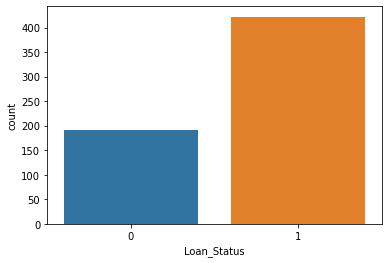

In [20]:
print(data["Loan_Status"].value_counts())
sns.countplot(data['Loan_Status'])

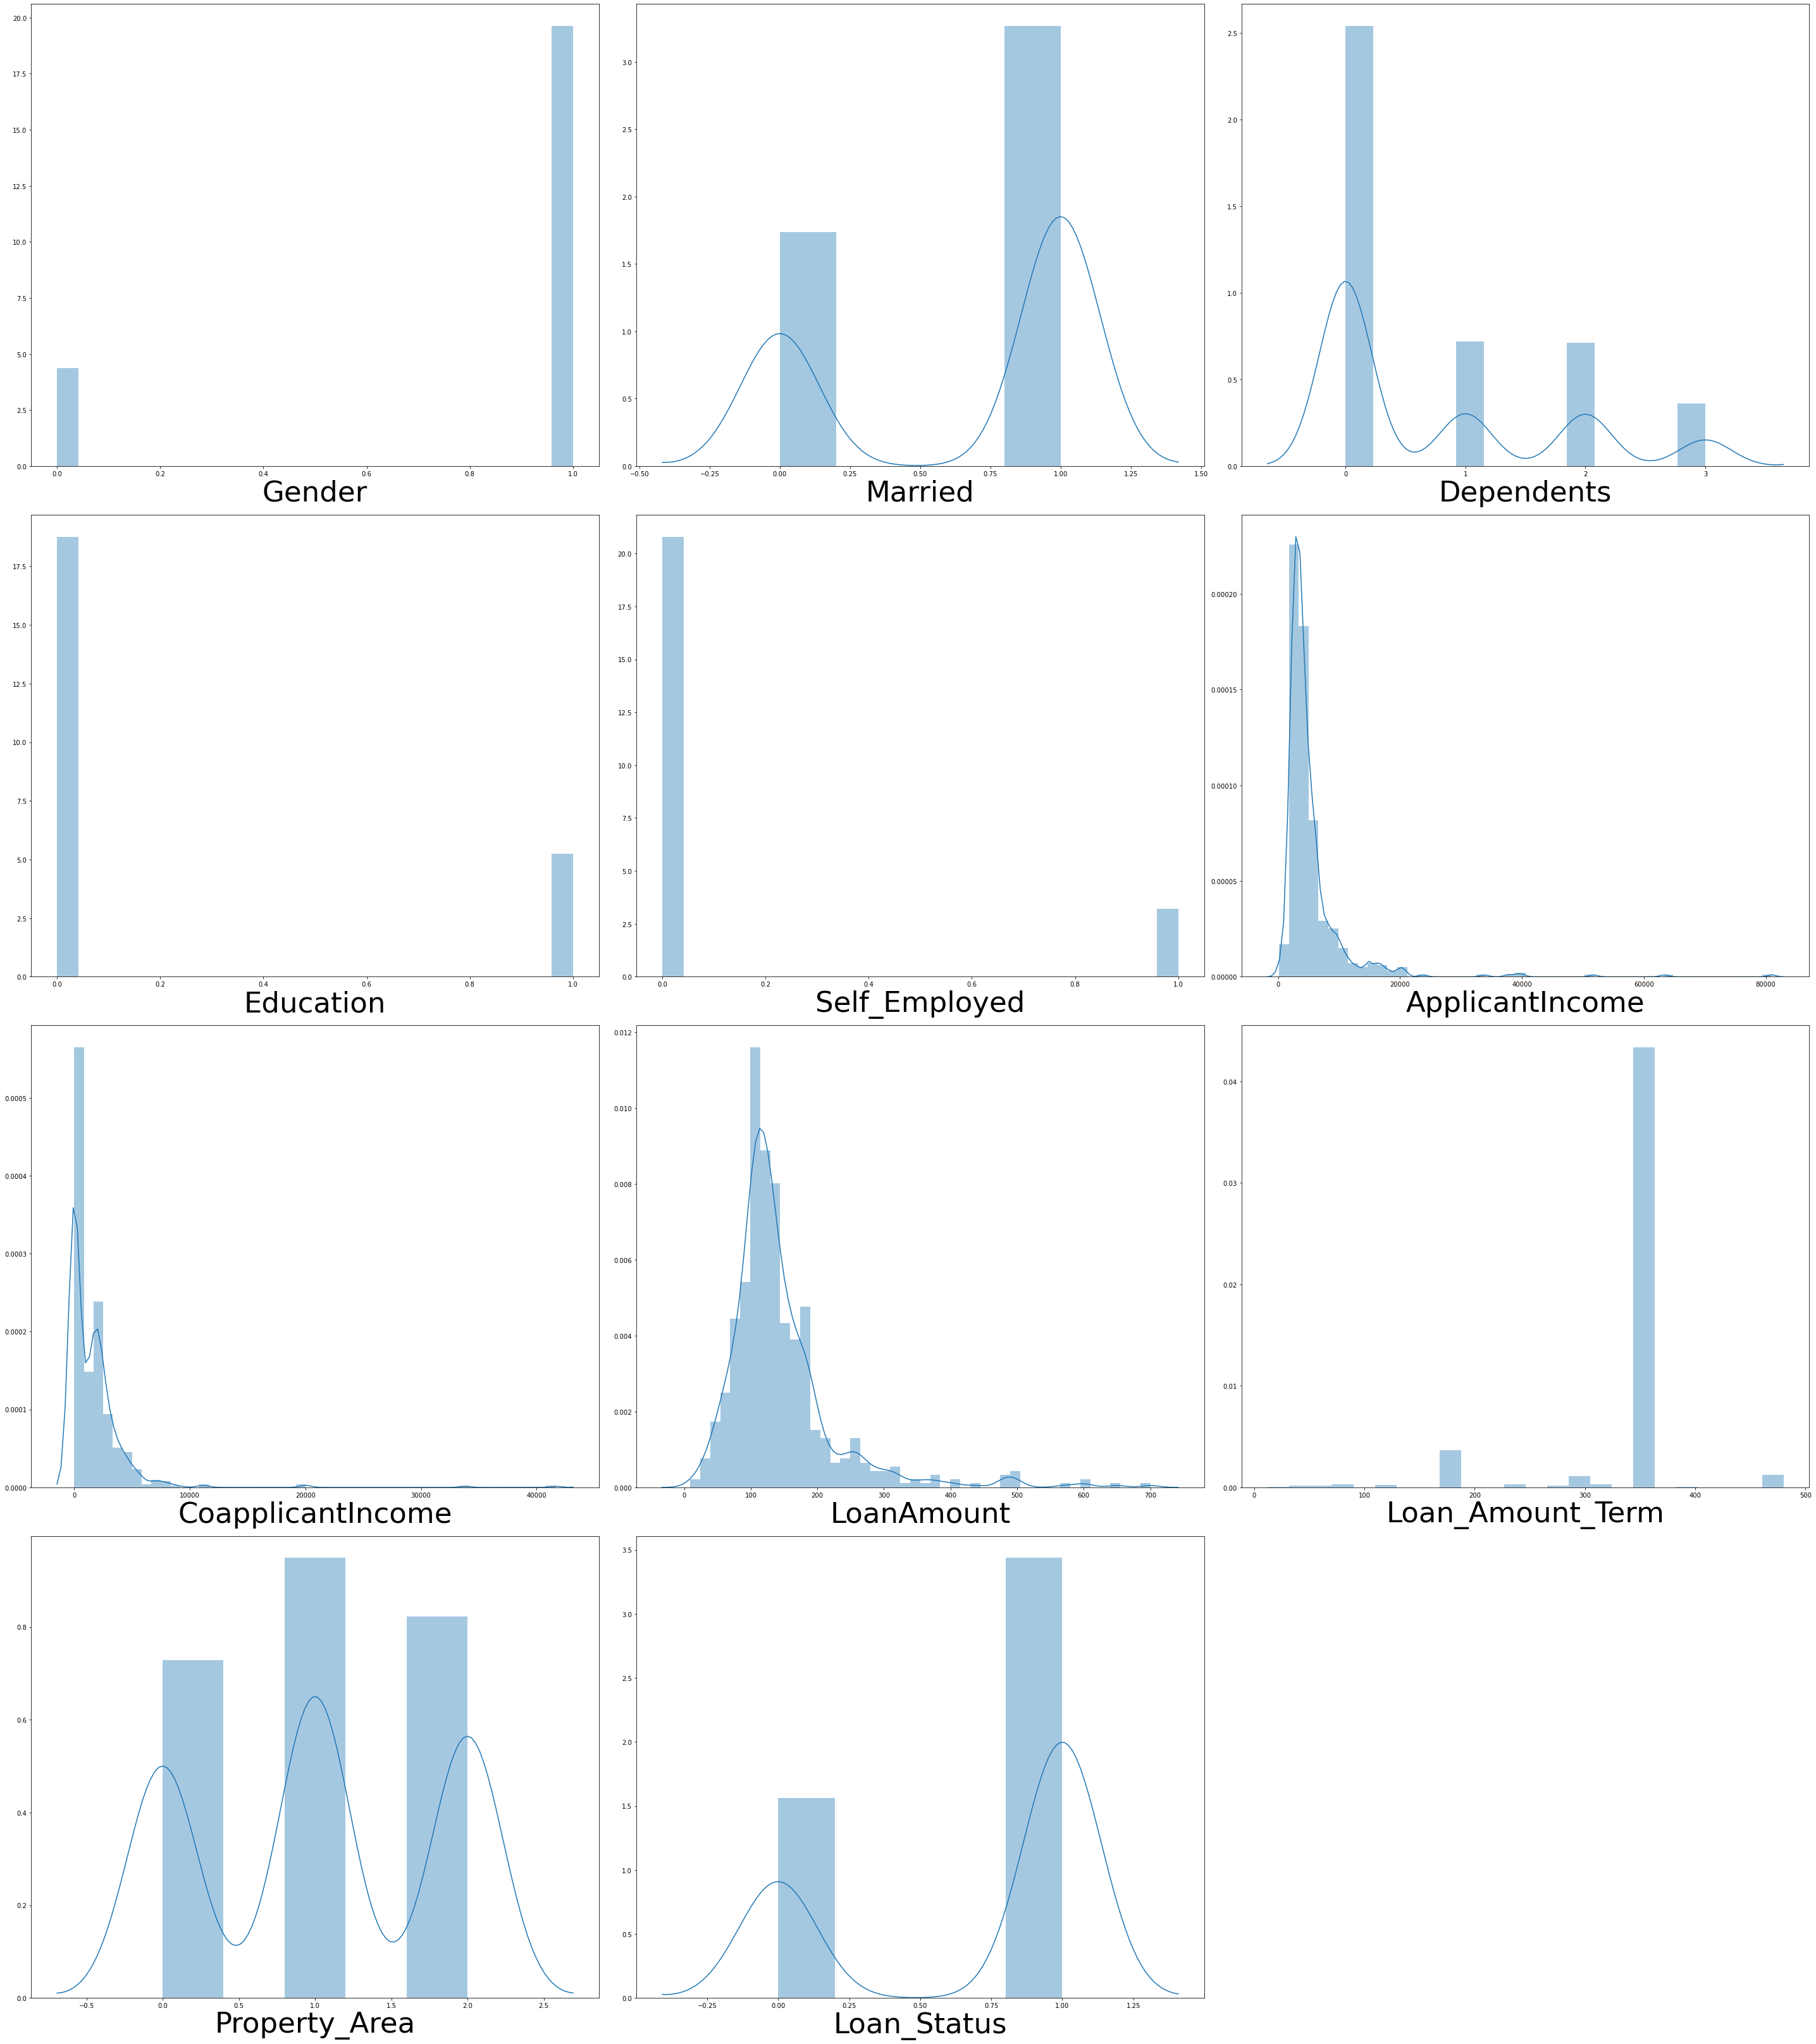

In [21]:
plt.figure(figsize=(40,45))
plotnumber=1
for column in data:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=45)
        plt.xlabel(column,fontsize=45)
    plotnumber+=1
plt.tight_layout()

In [22]:
data["ApplicantIncome"]=np.log(data["ApplicantIncome"])
data["LoanAmount"]=np.log(data["LoanAmount"])

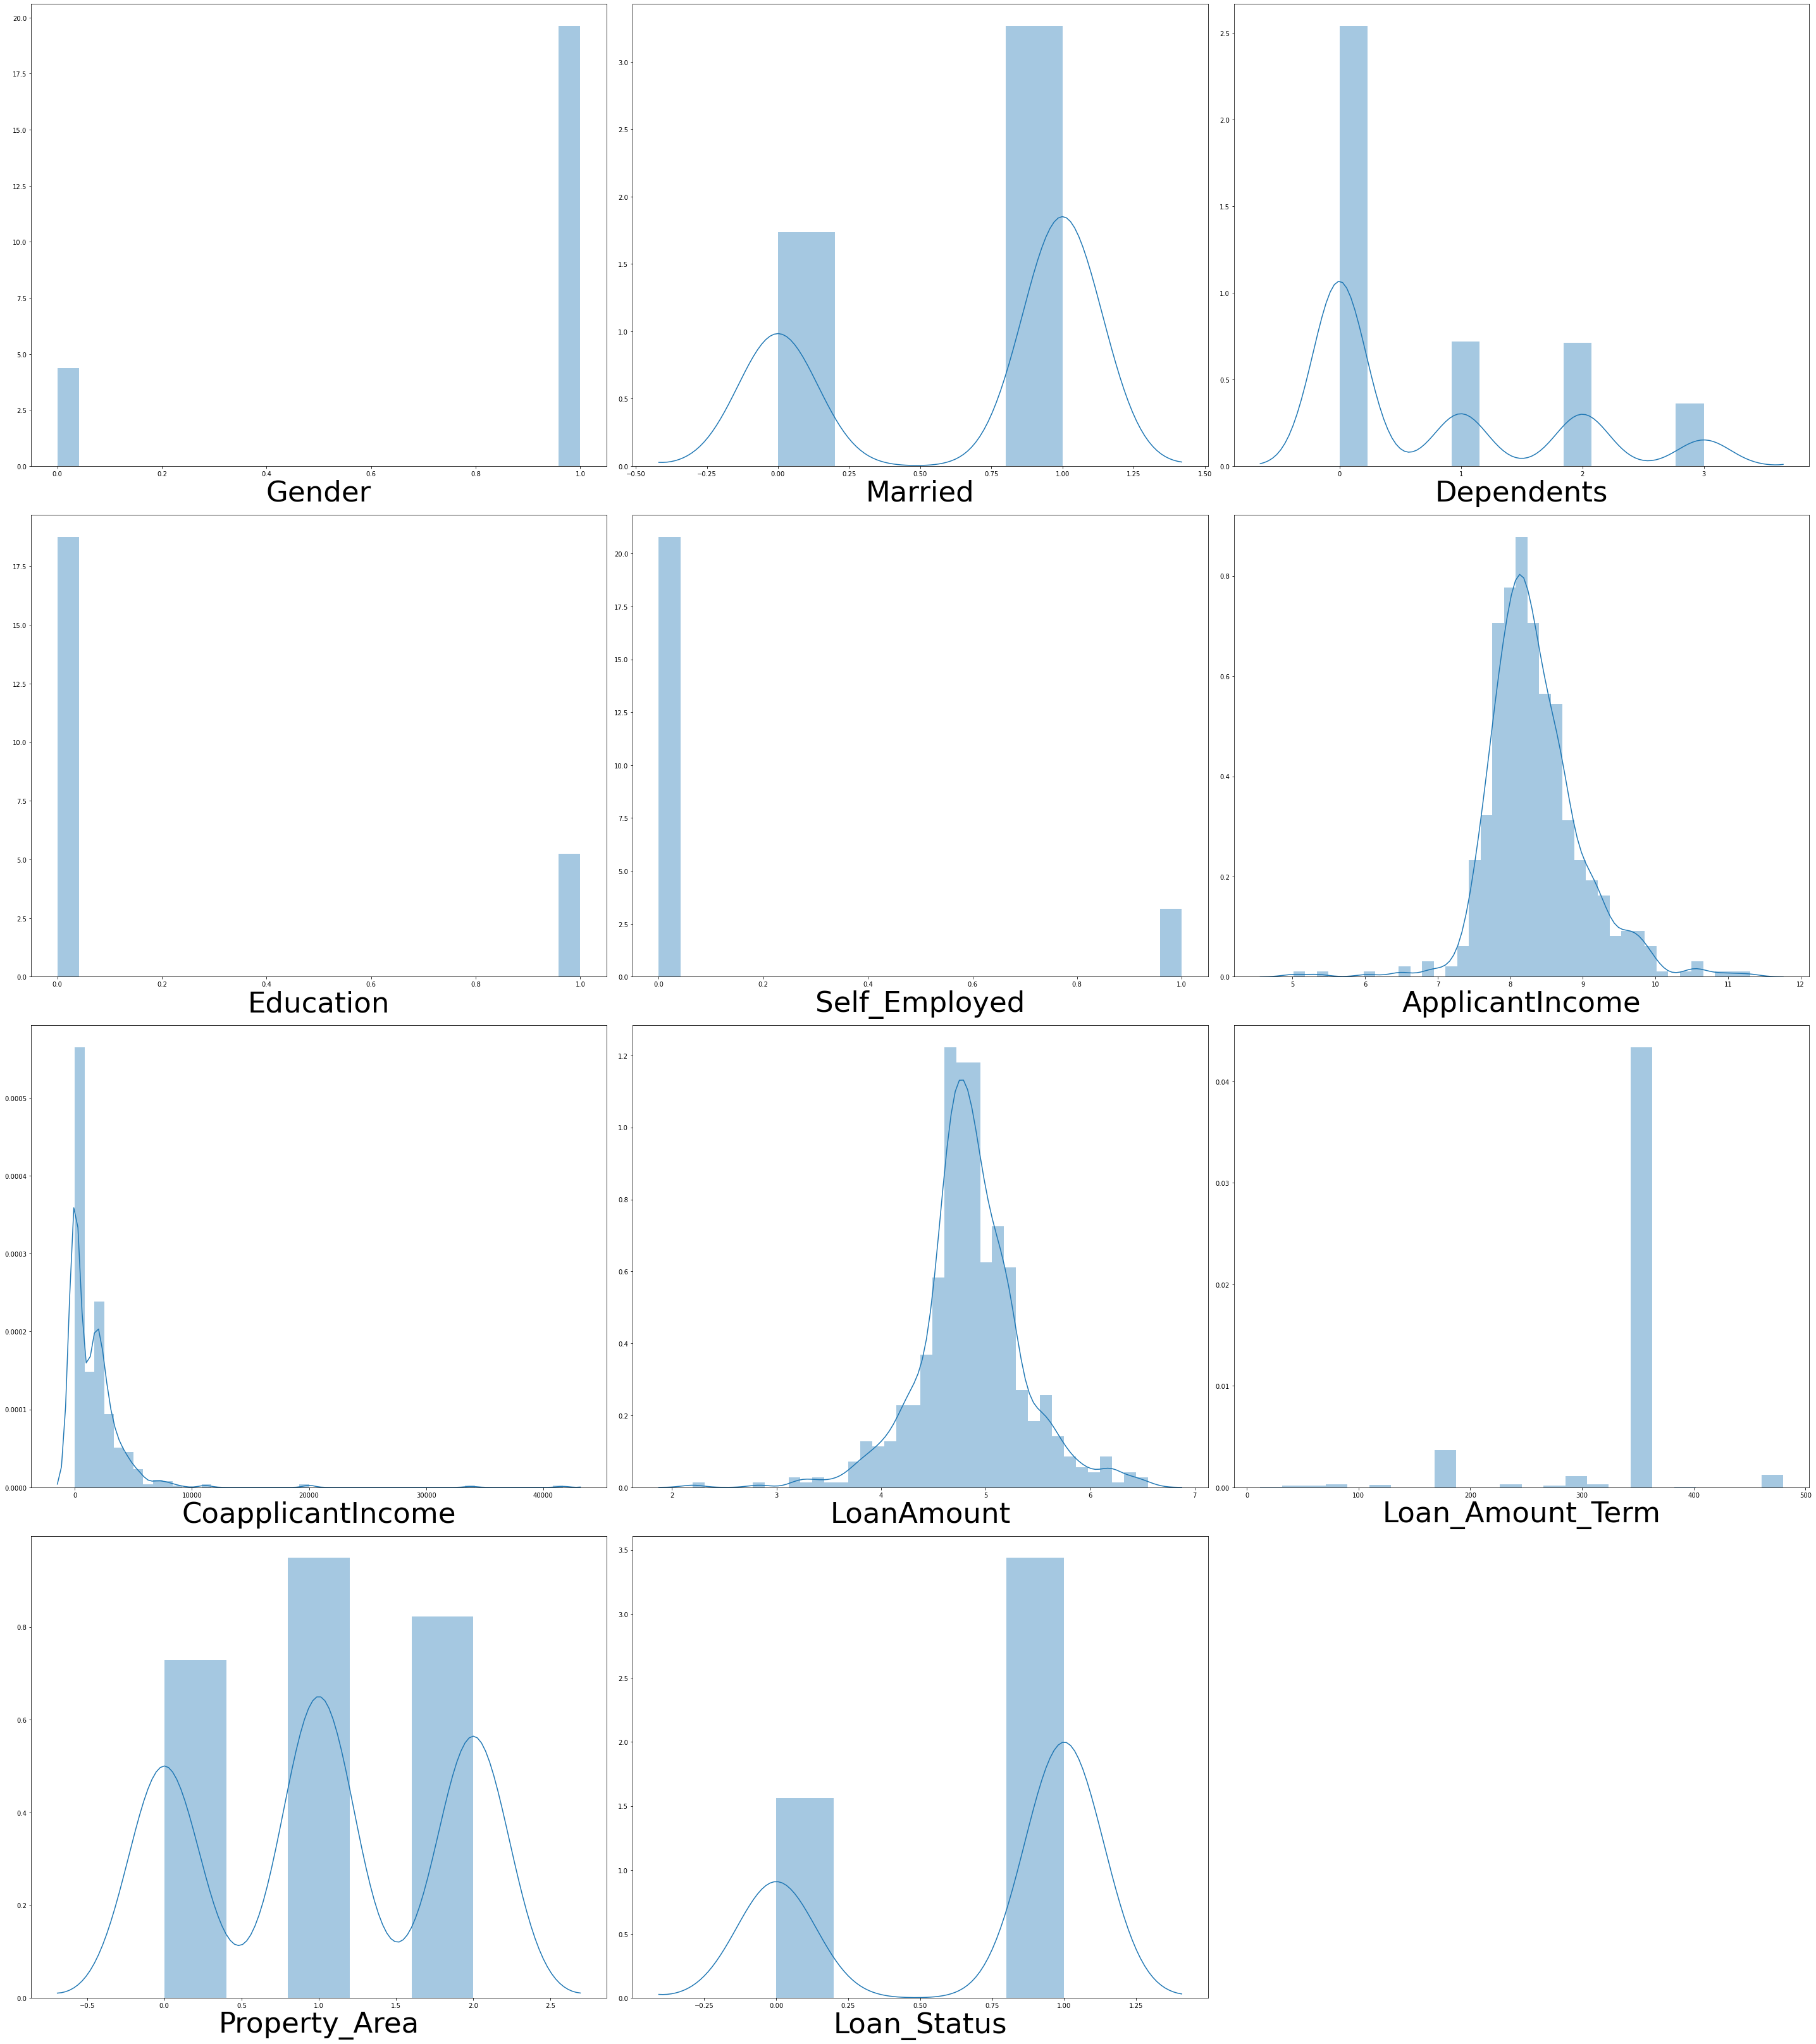

In [23]:
plt.figure(figsize=(40,45))
plotnumber=1
for column in data:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=45)
        plt.xlabel(column,fontsize=45)
    plotnumber+=1
plt.tight_layout()

In [24]:
#Having removed the skewness , we are good to go.
data.shape

(614, 11)

In [25]:
corr=data.corr()
corr.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Property_Area',
       'Loan_Status'],
      dtype='object')

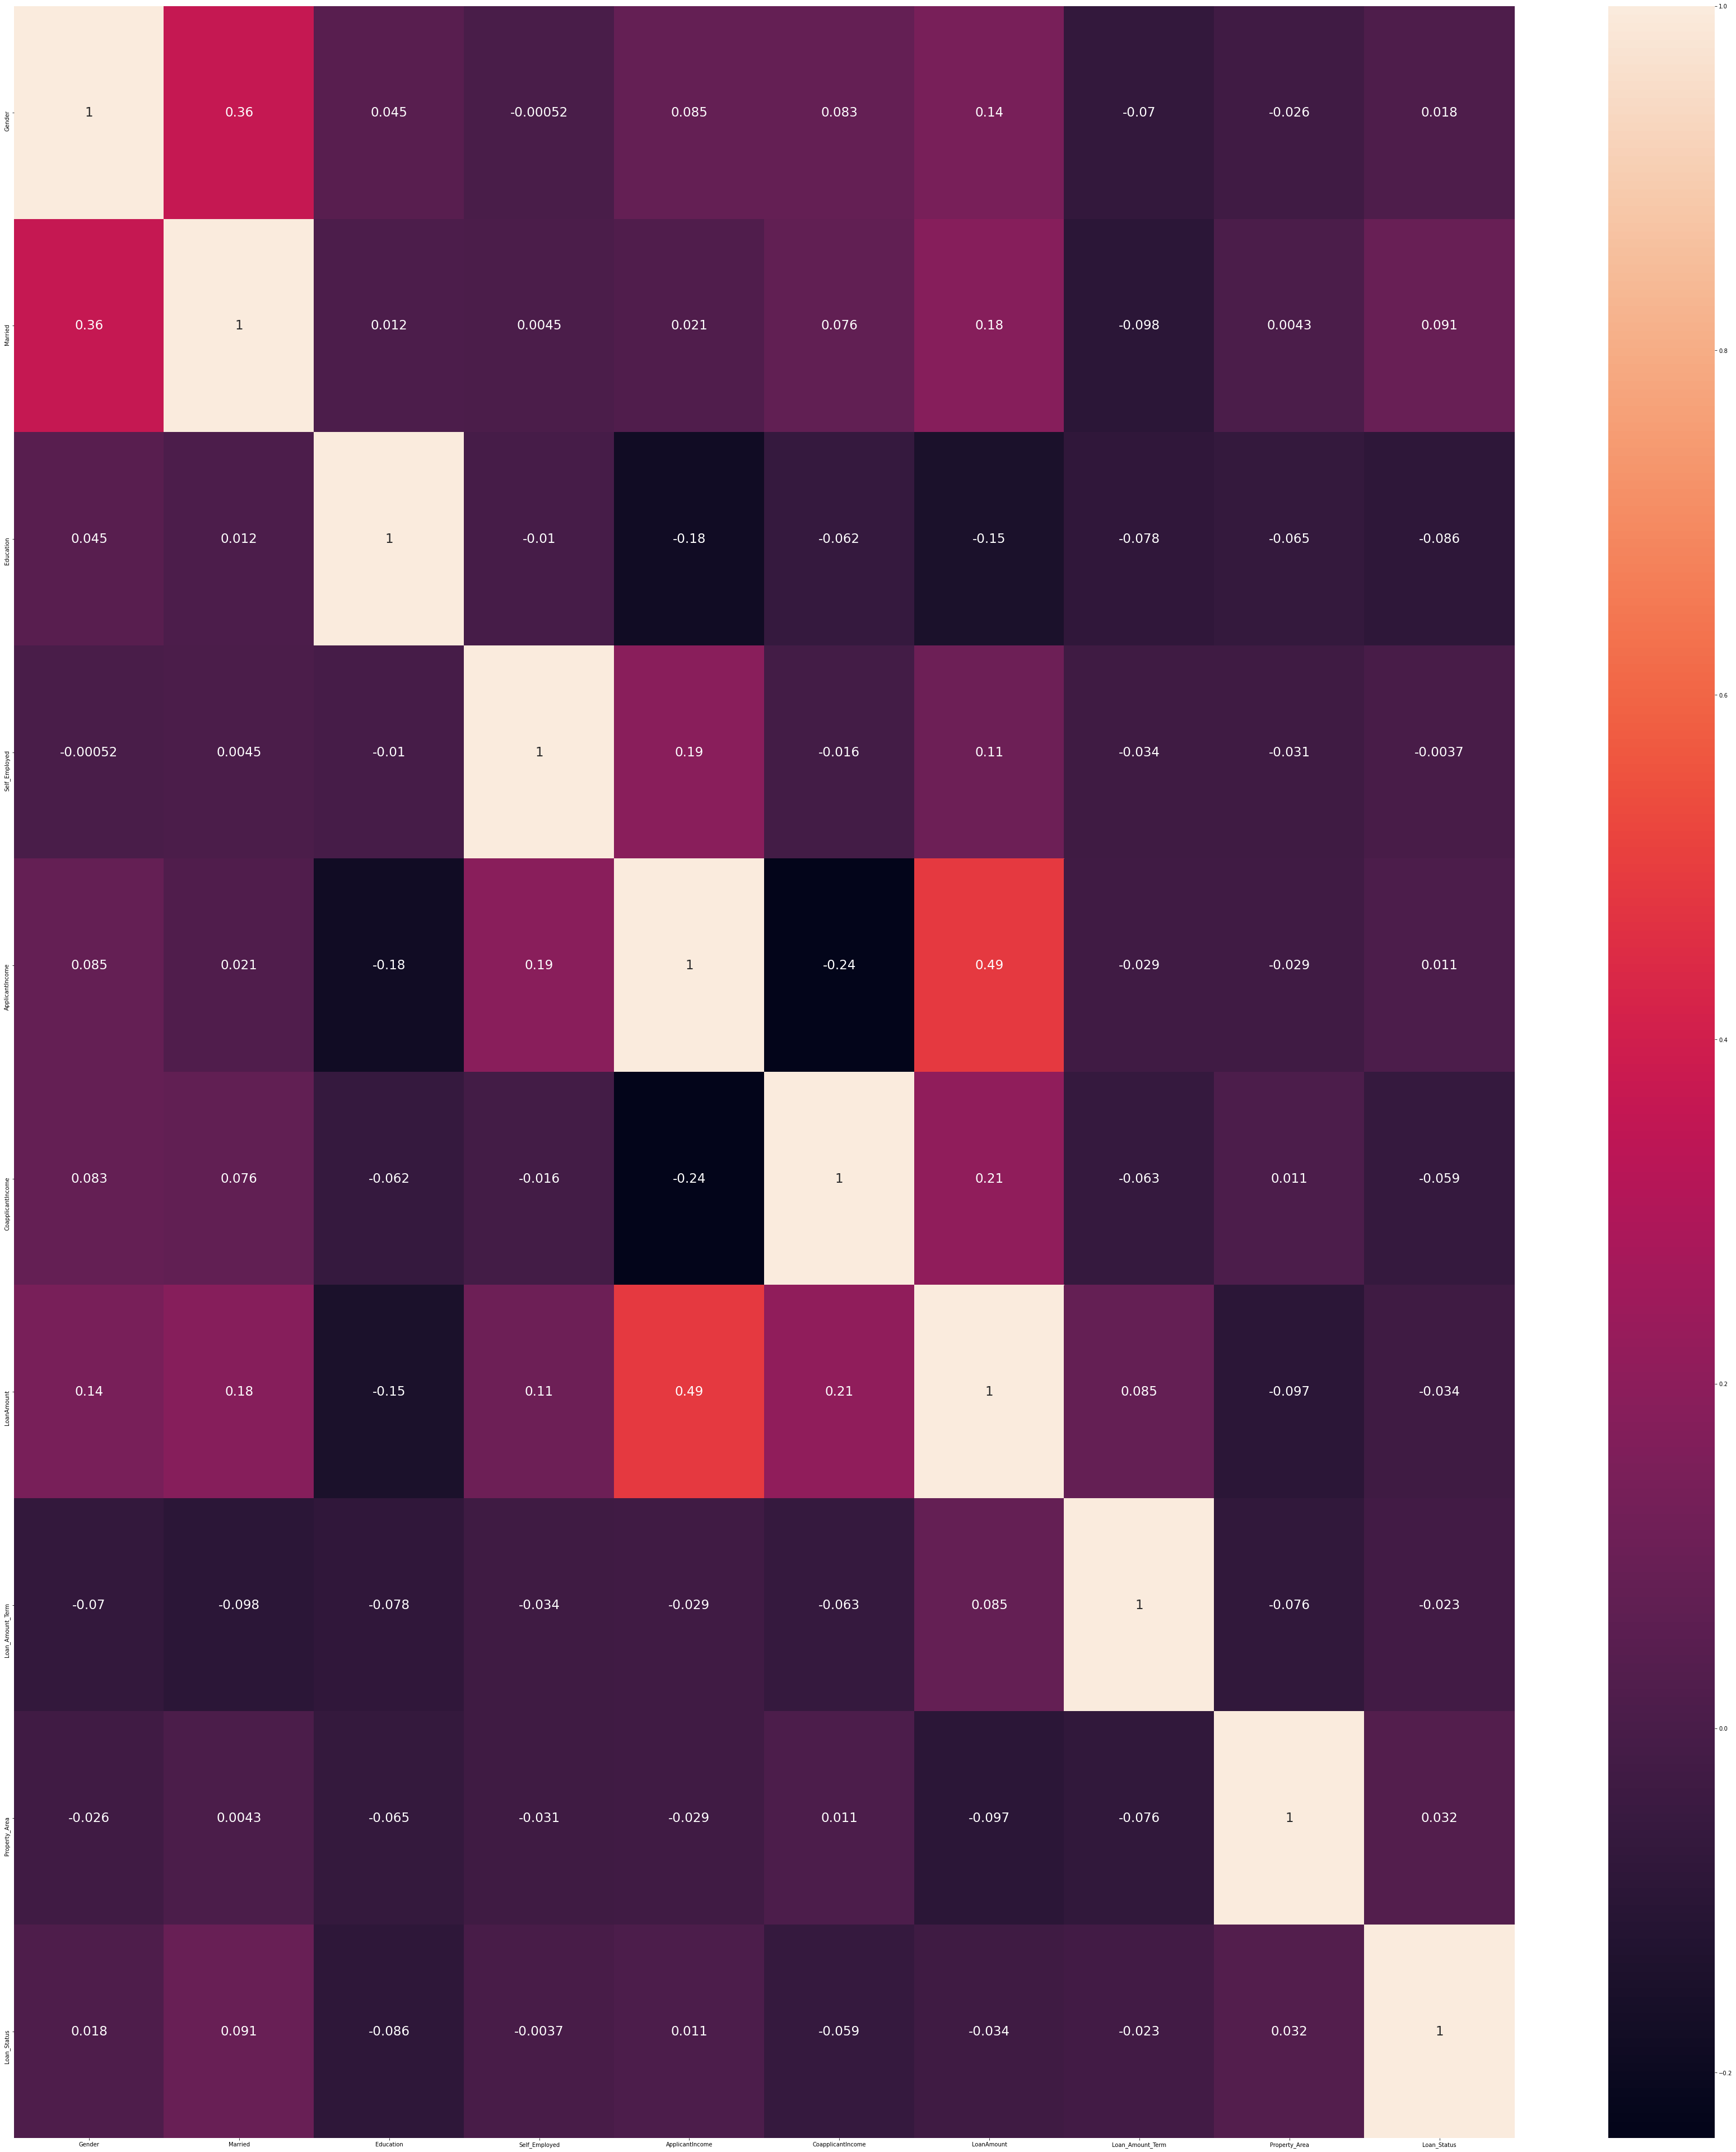

In [26]:
plt.figure(figsize=(60,70))
sns.heatmap(corr,annot=True,annot_kws={'size':23}) 
plt.show()

In [27]:
from sklearn.feature_selection import SelectKBest,f_classif 

In [28]:
x=data.drop("Loan_Status",axis=1)
y=data.Loan_Status

best_features=SelectKBest(score_func=f_classif,k=10)
fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)
feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=["Column_names","Scores_obtained"]
print(feature_scores.nlargest(10,"Scores_obtained"))  

        Column_names  Scores_obtained
1            Married         5.164552
3          Education         4.547685
6  CoapplicantIncome         2.151457
7         LoanAmount         0.724903
9      Property_Area         0.631733
8   Loan_Amount_Term         0.315164
0             Gender         0.198059
5    ApplicantIncome         0.073749
2         Dependents         0.062665
4      Self_Employed         0.008380


In [31]:
final_data=data[["Married","Education","CoapplicantIncome","LoanAmount","Property_Area","Loan_Amount_Term","Gender","ApplicantIncome","Dependents"]]

In [34]:
x=final_data
y=data.Loan_Status

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=45)
from imblearn.over_sampling import SMOTE
from collections import Counter 
sm=SMOTE()
samp=SMOTE(0.75)
x_trains,y_trains=samp.fit_resample(x_train,y_train)
print("Before transformation",format(Counter(y_train)))
print("After Transformation",format(Counter(y_trains)))

Before transformation Counter({1: 322, 0: 138})
After Transformation Counter({1: 322, 0: 241})


In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
from time import time
start=time()
knn.fit(x_trains,y_trains)
print("Training Time:",time()-start) 

start=time()
y_pred=knn.predict(x_test)
print("Testing Time:",time()-start)

Training Time: 0.5584523677825928
Testing Time: 0.14803791046142578


In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.35      0.24      0.29        54
           1       0.65      0.76      0.70       100

    accuracy                           0.58       154
   macro avg       0.50      0.50      0.49       154
weighted avg       0.55      0.58      0.56       154



In [38]:
confusion_matrix(y_test,y_pred)

array([[13, 41],
       [24, 76]], dtype=int64)

In [39]:
from sklearn.model_selection import cross_val_score

In [42]:
cross_val_score(knn,x_trains,y_trains,cv=7).mean()

0.611331569664903

In [43]:
from sklearn.model_selection import GridSearchCV
param_grid={"algorithm" : ["kd_tree","brute"],
           "leaf_size" : range(4,8),
           "n_neighbors" : [3,4,5,6,7]}

In [44]:
grdsrch=GridSearchCV(estimator=knn,param_grid=param_grid)

In [45]:
grdsrch.fit(x_trains,y_trains)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': range(4, 8),
                         'n_neighbors': [3, 4, 5, 6, 7]})

In [46]:
grdsrch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 4, 'n_neighbors': 3}

In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(algorithm= 'kd_tree',leaf_size=4, n_neighbors=3)
from time import time
start=time()
knn.fit(x_trains,y_trains)
print("Training Time:",time()-start) 

start=time()
y_pred=knn.predict(x_test)
print("Testing Time:",time()-start)

Training Time: 0.05208444595336914
Testing Time: 0.10654616355895996


In [49]:
y_pred=knn.predict(x_test)


In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.37      0.30      0.33        54
           1       0.66      0.73      0.69       100

    accuracy                           0.58       154
   macro avg       0.51      0.51      0.51       154
weighted avg       0.56      0.58      0.56       154



In [51]:
#Lets check on other algorithms as well 

In [52]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()

start=time()
dt.fit(x_trains,y_trains)
print("Training Time:",time()-start)
start=time()
y_pred=dt.predict(x_test)
print("Training Time:",time()-start) 



Training Time: 0.45671820640563965
Training Time: 0.023034095764160156


In [53]:
cfm=confusion_matrix
cfm(y_test,y_pred)

array([[16, 38],
       [25, 75]], dtype=int64)

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.39      0.30      0.34        54
           1       0.66      0.75      0.70       100

    accuracy                           0.59       154
   macro avg       0.53      0.52      0.52       154
weighted avg       0.57      0.59      0.58       154



In [55]:
cross_val_score(dt,x_trains,y_trains,cv=10).mean()

0.6327067669172932

In [56]:
param_grid={"criterion": ["gini","entropy"],  
           "max_depth": range(6,15),
           "min_samples_leaf": range(2,8),
           "min_samples_split": range(3,5)}

In [57]:
grdsrch=GridSearchCV(estimator=dt,param_grid=param_grid)
grdsrch.fit(x_trains,y_trains)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(6, 15),
                         'min_samples_leaf': range(2, 8),
                         'min_samples_split': range(3, 5)})

In [58]:
grdsrch.best_params_



{'criterion': 'gini',
 'max_depth': 12,
 'min_samples_leaf': 5,
 'min_samples_split': 3}

In [59]:
dt=DecisionTreeClassifier(criterion= 'gini',
 max_depth=12,
 min_samples_leaf= 5,
 min_samples_split= 3)

start=time()
dt.fit(x_trains,y_trains)
print("Training Time:",time()-start)
start=time()
y_pred=dt.predict(x_test)
print("Training Time:",time()-start) 


Training Time: 0.025007247924804688
Training Time: 0.013091325759887695


In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.47      0.33      0.39        54
           1       0.69      0.80      0.74       100

    accuracy                           0.64       154
   macro avg       0.58      0.57      0.57       154
weighted avg       0.61      0.64      0.62       154



In [61]:
#An accuracy of 64% in achieved 

In [62]:
from sklearn.ensemble import AdaBoostClassifier

ad=AdaBoostClassifier()
ad.fit(x_trains,y_trains)
y_pred=ad.predict(x_test)



In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.32      0.22      0.26        54
           1       0.64      0.74      0.69       100

    accuracy                           0.56       154
   macro avg       0.48      0.48      0.47       154
weighted avg       0.52      0.56      0.54       154



In [64]:
cross_val_score(ad,x_trains,y_trains,cv=6).mean()

0.6430831998779838

In [65]:
#model is underfitting the data ,lets check on other algorithms

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt=GradientBoostingClassifier()

gbdt.fit(x_trains,y_trains)
y_pred=gbdt.predict(x_test)

In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.30      0.37        54
           1       0.69      0.84      0.76       100

    accuracy                           0.65       154
   macro avg       0.59      0.57      0.56       154
weighted avg       0.62      0.65      0.62       154



In [79]:
param_grid={  
           "max_depth": range(2,5),
           "min_samples_leaf": range(2,10),
           "min_samples_split": range(2,7)}

In [80]:
grdsrch=GridSearchCV(estimator=gbdt,param_grid=param_grid)
grdsrch.fit(x_trains,y_trains)

GridSearchCV(estimator=GradientBoostingClassifier(max_depth=4,
                                                  min_samples_leaf=5,
                                                  min_samples_split=3),
             param_grid={'max_depth': range(2, 5),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 7)})

In [81]:
grdsrch.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [82]:
gbdt=GradientBoostingClassifier(max_depth=4, min_samples_leaf=5, min_samples_split=3)

gbdt.fit(x_trains,y_trains)
y_pred=gbdt.predict(x_test)

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.41      0.26      0.32        54
           1       0.67      0.80      0.73       100

    accuracy                           0.61       154
   macro avg       0.54      0.53      0.52       154
weighted avg       0.58      0.61      0.58       154



In [78]:
# Hence the accuracy decreased .


In [85]:
gbdt=GradientBoostingClassifier()

gbdt.fit(x_trains,y_trains)
y_pred=gbdt.predict(x_test)

In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.30      0.37        54
           1       0.69      0.84      0.76       100

    accuracy                           0.65       154
   macro avg       0.59      0.57      0.56       154
weighted avg       0.62      0.65      0.62       154



In [88]:
final_model="loanstatusappication.pickle"
pickle.dump(gbdt,open(final_model,'wb'))      